In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
media = pd.read_csv('https://raw.githubusercontent.com/sahilb8/Hotstar-Netflix-Case-Study/master/data/mediacompany.csv')
media = media.drop('Unnamed: 7',axis=1)

In [33]:
media.head()
#here Cricket_match_india is 1 if there was a match and 0 else.
#Character_A is 1 if any famous person is present and 0 else.

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [34]:
media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 80 non-null     object
 1   Views_show           80 non-null     int64 
 2   Visitors             80 non-null     int64 
 3   Views_platform       80 non-null     int64 
 4   Ad_impression        80 non-null     int64 
 5   Cricket_match_india  80 non-null     int64 
 6   Character_A          80 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 4.5+ KB


In [35]:
#converting the Date to pandas datetime format
media['Date'] = pd.to_datetime(media['Date']).dt.date

In [36]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


In [37]:
# Deriving "days since the show started"
from datetime import date

d0 = date(2017, 2, 28)
d1 = media.Date
diff = d1 - d0
media['day']= diff

In [38]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days


In [39]:
#cleaning days
media['day'] = media['day'].astype(str)
media['day'] = media['day'].map(lambda x:x[0:2])
media['day'] = media['day'].astype(int)

In [40]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5


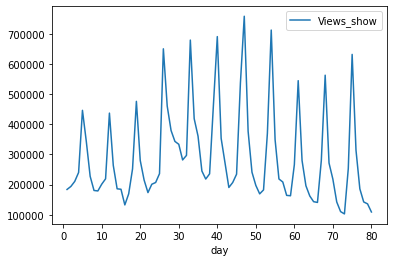

In [41]:
#plot days vs views_show
media.plot.line(x='day', y='Views_show')
#the spikes represent the weekends, there is a intial increase in the viewership, but a sharp decline after day 45

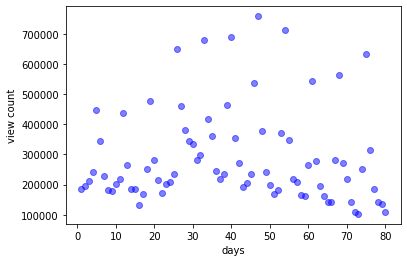

In [42]:
#scatter plot of days vs views_show
plt.scatter(media.day, media.Views_show, color='b',alpha=0.5)
plt.xlabel('days')
plt.ylabel('view count')
plt.show()

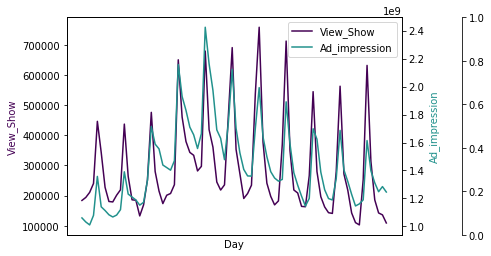

In [43]:
# plot for days vs Views_show and days vs Ad_impressions

fig = plt.figure()
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()

host.set_xlabel("Day")
host.set_ylabel("View_Show")
par1.set_ylabel("Ad_impression")

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.5)
color3 = plt.cm.viridis(.9)

p1, = host.plot(media.day,media.Views_show, color=color1,label="View_Show")
p2, = par1.plot(media.day,media.Ad_impression,color=color2, label="Ad_impression")

lns = [p1, p2]
host.legend(handles=lns, loc='best')

# right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))      
# no x-ticks                 
par2.xaxis.set_ticks([])
# Sometimes handy, same for xaxis
#par2.yaxis.set_ticks_position('right')

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())

plt.savefig("pyplot_multiple_y-axis.png", bbox_inches='tight')

In [44]:
#derive a column weekday, where 1 coresponds to sunday and 7 to saturday
media['weekday'] = (media['day'] + 3) % 7  #the +3 because 1st march 2017 was a wednesday.
media.weekday.replace(0,7,inplace=True)
media['weekday'] = media['weekday'].astype(int)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1


In [45]:
#building our first model
x = media[['Visitors', 'weekday']]
y = media['Views_show']

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
#create an object of linear regression
lm = LinearRegression()

In [48]:
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
import statsmodels.api as sm
x = sm.add_constant(x)
lm_1 = sm.OLS(y,x).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     36.26
Date:                Mon, 20 Jul 2020   Prob (F-statistic):           8.01e-12
Time:                        15:08:47   Log-Likelihood:                -1042.5
No. Observations:                  80   AIC:                             2091.
Df Residuals:                      77   BIC:                             2098.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.862e+04   1.07e+05     -0.360      0.7

In [50]:
# create Weekend variable, with value 1 at weekends and 0 at weekdays
def cond(i):
    if i % 7 == 5: return 1
    elif i % 7 == 4: return 1
    else :return 0
    return i

media['weekend']=[cond(i) for i in media['day']]

In [51]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1


In [57]:
x = media[['Visitors', 'Character_A', 'weekend']]
y = media['Views_show']

In [58]:
import statsmodels.api as sm

x = sm.add_constant(x)

lm_2 = sm.OLS(y,x).fit()

In [59]:
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Mon, 20 Jul 2020   Prob (F-statistic):           1.53e-14
Time:                        15:09:25   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

In [60]:
x = media[['Visitors', 'weekend', 'Character_A', 'Ad_impression']]
y = media['Views_show']

In [61]:
import statsmodels.api as sm
x = sm.add_constant(x)

lm_3 = sm.OLS(y,x).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     76.40
Date:                Mon, 20 Jul 2020   Prob (F-statistic):           1.10e-25
Time:                        15:11:10   Log-Likelihood:                -1004.1
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.834e+05   6.97e+04     -4.067

In [62]:
#since looking at the above model , visitors is the most insignificant column, so lets remove it
x = media[['weekend', 'Character_A', 'Ad_impression']]
y = media['Views_show']

In [63]:
x = sm.add_constant(x)
lm_4 = sm.OLS(y,x).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Mon, 20 Jul 2020   Prob (F-statistic):           1.05e-26
Time:                        15:15:40   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.661e+05   4.74e+04     -5.609

In [64]:
#as we can see the Ad_impression coefficient is very small as compared to others , so lets scale in per million
media['Ad_impression_million'] = media['Ad_impression']/1000000

In [65]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend,Ad_impression_million
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0,1060.860448
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0,1031.846645
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0,1010.867575
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1,1079.194579
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1,1357.736987


In [66]:
#running 5th model
x = media[['weekend', 'Character_A', 'Ad_impression_million', 'Cricket_match_india']]
y = media['Views_show']
x = sm.add_constant(x)
lm_5 = sm.OLS(y,x).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     76.59
Date:                Mon, 20 Jul 2020   Prob (F-statistic):           1.02e-25
Time:                        15:19:03   Log-Likelihood:                -1004.0
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.633e+

In [68]:
#removing cricket match india as its insignificant
x = media[['weekend','Character_A','Ad_impression_million']]

y = media['Views_show']

In [69]:
x = sm.add_constant(x)
lm_6 = sm.OLS(y,x).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Mon, 20 Jul 2020   Prob (F-statistic):           1.05e-26
Time:                        15:21:15   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.661e+

In [70]:
#as we can see Character_A is not much significant , lets remove it
x = media[['weekend','Ad_impression_million']]

y = media['Views_show']

In [71]:
x = sm.add_constant(x)
lm_7 = sm.OLS(y,x).fit()
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     151.7
Date:                Mon, 20 Jul 2020   Prob (F-statistic):           1.95e-27
Time:                        15:28:32   Log-Likelihood:                -1005.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      77   BIC:                             2023.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.302e+

In [72]:
#always think in bussiness point of view also and not strictly in mathematical point of view.
#making predictions using the lm_t model
from sklearn.metrics import mean_squared_error, r2_score
predicted_values = lm_7.predict(x)

In [76]:
mse = mean_squared_error(media.Views_show, predicted_values)
r_squared = r2_score(media.Views_show, predicted_values)

In [77]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 4797239258.824437
r_square_value : 0.7975978797926214


Text(0, 0.5, 'Views')

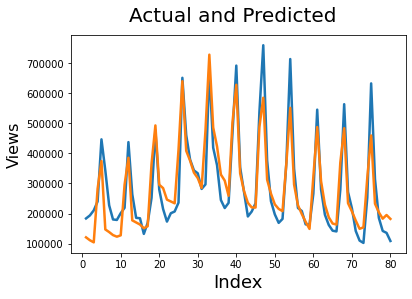

In [81]:
#Actual vs Predicted
c = [i for i in range(1,81)]
fig = plt.figure()
plt.plot(c,media.Views_show, linewidth=2.5,linestyle='-')
plt.plot(c,predicted_values, linewidth=2.5,linestyle='-')
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)                               # Y-label

Text(0, 0.5, 'Views_show-Predicted_views')

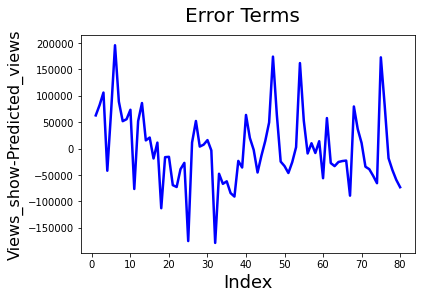

In [84]:
# Error terms
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,media.Views_show-predicted_values, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Views_show-Predicted_views', fontsize=16)                # Y-label